### Load Data

In [5]:
file_name = file.path("./data", "bmi_age.txt")
data_bmi = read.table(file = file_name, header = TRUE, stringsAsFactors = FALSE)
data_bmi

PID,BMI,SEX,AGE
1,22,1,45
2,27,0,57
3,31,1,66
4,24,1,49
5,23,0,33
6,18,0,40
7,21,0,65
8,26,1,59
9,34,1,65
10,20,0,42


### Bootstrapping

In [4]:
set.seed(4132697)
nboot=3 #number of boostrap samples
nsubj=nrow(data_bmi) #number of subjects

#start bootstrapping
for (i in 1:nboot)
{
     #begin the bootstrap for loop
     resampling = sample(nsubj, replace=TRUE)
     bootstrapped_data = data_bmi[resampling,]
     print(bootstrapped_data)
     cat(" \n \n")

}

    PID BMI SEX AGE
3     3  31   1  66
5     5  23   0  33
9     9  34   1  65
1     1  22   1  45
8     8  26   1  59
3.1   3  31   1  66
2     2  27   0  57
5.1   5  23   0  33
8.1   8  26   1  59
4     4  24   1  49
 
 
    PID BMI SEX AGE
8     8  26   1  59
6     6  18   0  40
2     2  27   0  57
9     9  34   1  65
10   10  20   0  42
4     4  24   1  49
2.1   2  27   0  57
1     1  22   1  45
4.1   4  24   1  49
7     7  21   0  65
 
 
     PID BMI SEX AGE
8      8  26   1  59
9      9  34   1  65
2      2  27   0  57
7      7  21   0  65
9.1    9  34   1  65
3      3  31   1  66
8.1    8  26   1  59
4      4  24   1  49
10    10  20   0  42
10.1  10  20   0  42
 
 


In [11]:
attach(data_bmi)

[1] "list"

In [29]:
men_bmi<-BMI[SEX==1]
women_bmi<-BMI[SEX==0]
n_women<-length(women_bmi)
cat('n_women: ', n_women)
n_men<-length(men_bmi)
cat("\nn_men:", n_men)

n_women:  5
n_men: 5

In [30]:
m_diff <- mean(men_bmi) - mean(women_bmi)
m_diff

[1] 5.6

### Calculate Mean Difference from Bootstrap

In [32]:
B_boot<-10000 #number of bootstrap samples
mean_diff=rep(NA,B_boot) #define the vector storing the differences in BMI
for (i in 1:B_boot)
{
    mm<-mean(men_bmi[sample(1:n_men,replace=TRUE)]) #calculate the mean for men
    mw<-mean(women_bmi[sample(1:n_women,replace=TRUE)])
    mean_diff[i] <- mm - mw
}

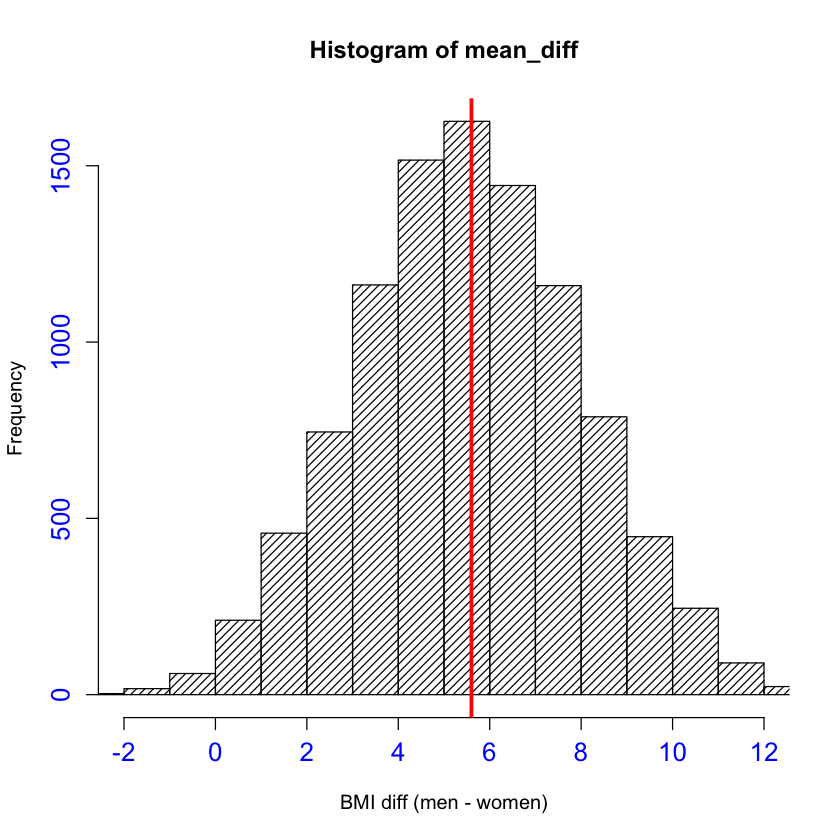

In [54]:
hist(mean_diff, density=20, xlim=c(-2, 12), cex.axis=1.3, xlab="BMI diff (men - women)", col.axis='blue')
abline(v=m_diff, col='red', lwd=3)

### Confident Intervals

In [55]:
mBoot<-mean(mean_diff)
sdBoot<-sd(mean_diff)
CI1<-c(mBoot-1.96*sdBoot,mBoot+1.96*sdBoot) # Normal approximation to 95% CI
CI2<-quantile(mean_diff,probs=c(0.025,0.975)) # Bootstrap 95% CI

In [58]:
round(CI1, digits=2)

[1]  0.88 10.39

In [59]:
CI2

2.5% 97.5% 
  1.0  10.4

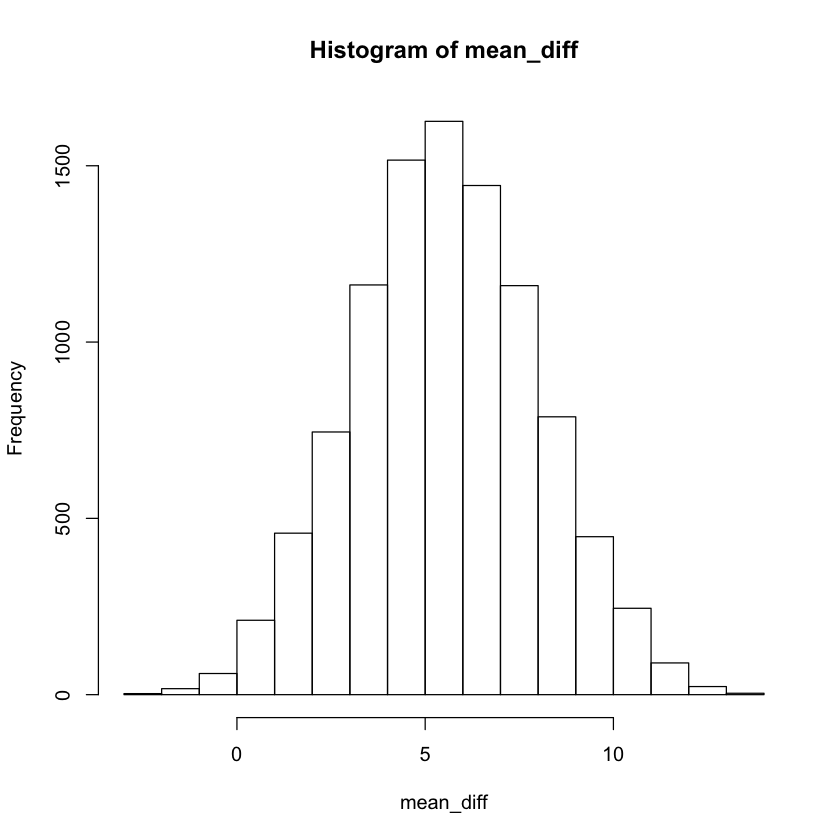

In [99]:
hist(mean_diff, density=20)
abline(CI1, col='red')